In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# from pyDOE import lhs
import torch
import sys
# from rnn_sde import *

from sklearn.metrics import mean_squared_error, mean_absolute_error
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

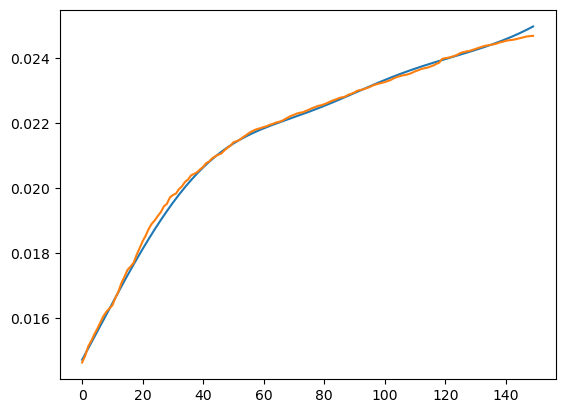

In [10]:
Ia =np.loadtxt("Figures/I_pred_0.94_2_0.01.txt")
Ip =np.loadtxt("Figures/I_true_0.94_2_0.01.txt")

gsi_p =np.loadtxt("Figures/gsi_pred_0.94_2_0.01_0.2.txt")
gsi_a =np.loadtxt("Figures/gsi_act_0.94_2_0.01_0.2.txt")

plt.plot(gsi_p)
plt.plot(gsi_a)

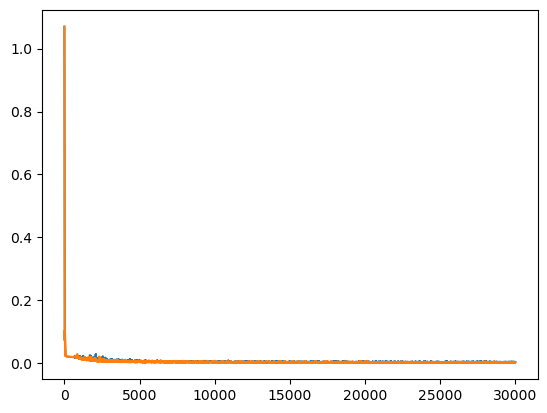

In [11]:
trainloss =np.loadtxt("Output/loss_train_30000_0.001.txt")
testloss =np.loadtxt("Output/loss_val_30000_0.001.txt")

plt.plot(trainloss)
plt.plot(testloss)

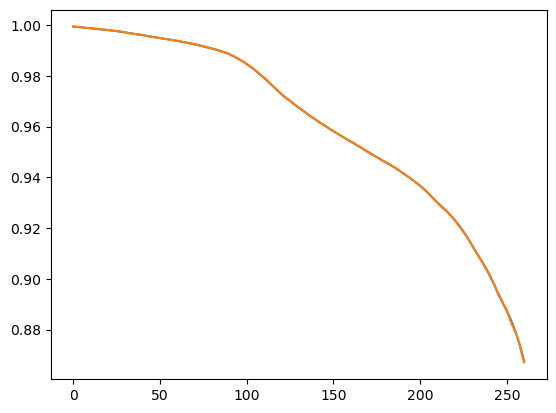

In [3]:
plt.plot(Sa)
plt.plot(Sp)

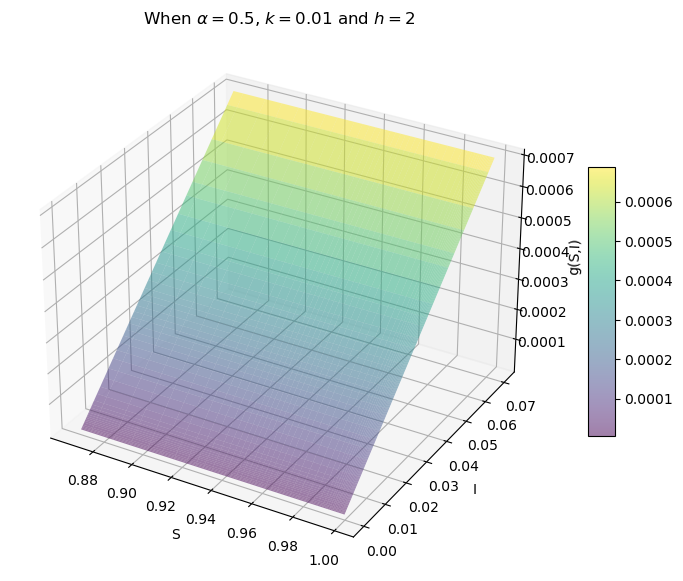

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set the values of k_v, alpha_v, and h
k_v = 0.01
alpha_v = 0.5
h = 2

# Set the range of values for s_p and i_p
s_p_range = Sa
i_p_range = Ia

# Create a meshgrid of s_p and i_p values
s_p, i_p = np.meshgrid(s_p_range, i_p_range)

# Calculate the values of gsi using the given equation
gsi = k_v * s_p**h * i_p / (s_p**h + alpha_v * i_p**h)

# Create the figure and the axes
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

cmap = cm.get_cmap('viridis')
# norm = plt.Normalize(gsi.min(), gsi.max())
# colors = cmap(norm(gsi))
# rcount, ccount, _ = colors.shape

# cmap = cm.get_cmap('plasma')
# Plot the surface with gsi as the first argument
# cmap = cm.get_cmap('plasma')
surf=ax.plot_surface(s_p, i_p, gsi, cmap=cmap, alpha=0.5)

# Add labels and title
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('g(S,I)')
ax.set_title(r'When $\alpha={}$, $k={}$ and $h={}$'.format(alpha_v, k_v, h))
fig.colorbar(surf, shrink=0.5, aspect=10)

# Rotate the plot to 45 degrees
# ax.view_init(elev=30, azim=360)

# Show the plot
plt.show()


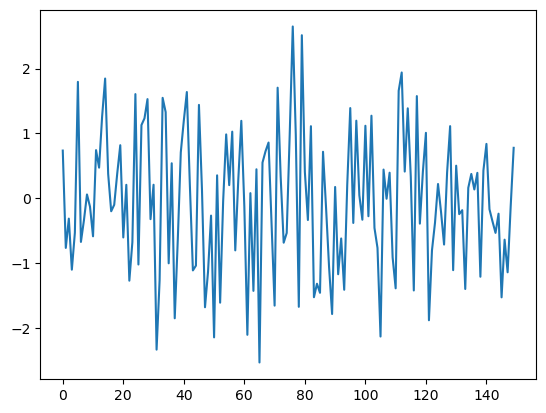

In [7]:
dw =np.random.normal(0, 1.0, size=(150, 1))
plt.plot(dw)

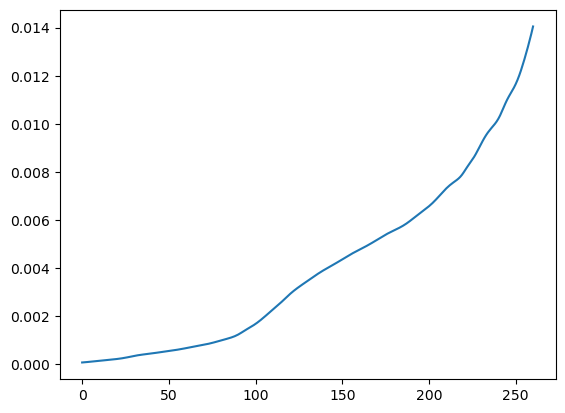

In [52]:

k_v =0.2
alpha_v=0.5
s_p =Sa
i_p =Ia
h=2
# gsi =k_v*s_p**h*i_p/(s_p**h +alpha_v*i_p**h)



gsi = k_v * s_p ** h * i_p / (s_p ** h + alpha_v * i_p ** h)

plt.plot(gsi)
# gsi = np.full((261, 261), gsi)

ValueError: Argument Z must be 2-dimensional.

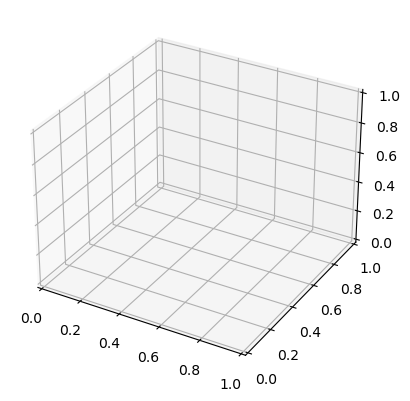

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data
# gsi_data = gsi
# sa_data = Sa
# ia_data = Ia

# # Create 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(gsi_data, sa_data, ia_data)

# # Set labels and title
# ax.set_xlabel('GSI')
# ax.set_ylabel('Sa')
# ax.set_zlabel('Ia')
# ax.set_title('3D Plot of GSI, Sa, and Ia')

# plt.show()



import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define your data for GSI, Sa, and Ia
gsi_data =gsi
sa_data = Sa
ia_data = Ia


# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
# ia_data_2d = np.reshape(ia_data, (len(gsi_data), len(sa_data)))
ax.plot_surface(gsi_data, sa_data, ia_data, cmap='viridis')


# Set axis labels and title
ax.set_xlabel('GSI')
ax.set_ylabel('Sa')
ax.set_zlabel('Ia')
ax.set_title('Surface Plot of GSI, Sa, and Ia')

# Display the plot
plt.show()



In [2]:
import numpy as np
import time 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import torch
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
#save the figures
c_dir =os.getcwd()
path = '/Output/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)
    
c_dir =os.getcwd()  #for sir with gsi models
path = '/Output1/'
out1 = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)

In [4]:
dat =pd.read_csv("tndata.csv")
def data_preprocess(dat, npoints, cs ="yes"):
    tdat=dat.reindex(index=dat.index[::-1])
    Inew=tdat['TOTAL_CONFIRMED']
    Rnew =tdat['TOTAL_INACTIVE_RECOVERED']
    nn =len(Rnew)
    N =100.00
    dd =np.arange(nn)
    if cs =="yes":
        s1 =CubicSpline(dd,Inew[:nn])
        s2 =CubicSpline(dd,Rnew[:nn])
        tt=np.linspace(0,nn, npoints)
        x, y1, y2 =tt, s1(tt), s2(tt)
        t, I1, R1 =x.reshape((-1,1)), y1.reshape((-1,1)), y2.reshape((-1,1))
        I2 =I1*100/(7.05*10**6)
        R2 =R1*100/(7.05*10**6)
        S2 =N-I2-R2
    else:
        tt=np.linspace(0,nn, npoints)
        y1 =np.array(Inew[:nn])
        y2 =np.array(Rnew[:nn])
        t, I1, R1 =tt.reshape((-1,1)), y1.reshape((-1,1)), y2.reshape((-1,1))
        I2 =I1*100/(7.05*10**6)
        R2 =R1*100/(7.05*10**6)
        S2 =N-I2-R2
    return t, S2, I2, R2
npoints =len(dat)
t1, S1, I1, R1 =data_preprocess(dat,  npoints,  "no") 

/tmp/ipykernel_930/649697848.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y1 =np.array(Inew[:nn])
/tmp/ipykernel_930/649697848.py:21: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y2 =np.array(Rnew[:nn])


### Plot Graphs

In [5]:
def plotting_graphs(I1, R1, n, Sd, Id, Rd, Ss, Is, Rs, eta, v, bd, gd, bs, gs):
    font= 20
    nn =len(I1)
    today = '04/16/2021' # Update this to include more data 
    days = pd.date_range(start='03/12/2020',end=today) 
    dd = np.arange(len(days))
    t = np.reshape(dd, [-1])
    nd = len(I1)
    days1 =np.arange(0,nn,1)
    Idata, Rdata =I1, R1
    Td = np.linspace(0,nn,nd)
    results0 = np.zeros((n,nd))
    results0[0,:] = Td
    results1 = Sd
    results2 = Id
    results3 = Rd
    results4 = Ss
    results5 = Is
    results6 = Rs
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(25, 7))
    ax0.set_title('Susceptible',fontsize = 20)
    ax0.plot(results0[0,:],np.mean(results1,0),'--r')
    ax0.plot(results0[0,:],np.mean(results4,0),'--b')
    ax0.fill_between(results0[0,:],
                     np.mean(results1,0)-(1.96*np.std(results1,0)/np.sqrt(results1.shape[0])),
                     np.mean(results1,0)+(1.96*np.std(results1,0)/np.sqrt(results1.shape[0])),alpha=0.5)
    ax0.set_xlabel('Days',fontsize = 20)
    ax0.set_ylabel('Population Percent',fontsize = 20)
    ax0.legend(('Deterministic', 'Stochastic'),loc='best',fontsize = 20)
    ax0.tick_params(labelsize=16)
    
    ax1.set_title('Infected',fontsize = 20)
    ax1.plot(days1,Idata,'o',markevery=10)
    ax1.plot(results0[0,:],np.mean(results2,0),'--r')
    ax1.plot(results0[0,:],np.mean(results5,0),'--b')
    ax1.fill_between(results0[0,:],                 
                     np.mean(results2,0)-(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
                     np.mean(results2,0)+(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),alpha=0.5)
    ax1.set_xlabel('Days',fontsize = 20)
    ax1.legend(('Data','Determinstic', 'Stochastic'),loc='best',fontsize = 20)
    ax1.tick_params(labelsize=16)

    ax2.set_title('Recovered',fontsize = 20)
    ax2.plot(days1,Rdata,'o',markevery=10)
    ax2.plot(results0[0,:],np.mean(results3,0),'--r')
    ax2.plot(results0[0,:],np.mean(results6,0),'--b')
    ax2.fill_between(results0[0,:],
                     np.mean(results3,0)-(1.96*np.std(results3,0)/np.sqrt(results3.shape[0])),
                     np.mean(results3,0)+(1.96*np.std(results3,0)/np.sqrt(results3.shape[0])),alpha=0.5)
    ax2.set_xlabel('Days',fontsize = 20)
    ax2.legend(('Data','Determinstic', 'Stochastic'),loc='best',fontsize = 20)
    ax2.tick_params(labelsize=16)
    fig.savefig(out+"fig_{}_{}.pdf".format(eta, v))
    fig.suptitle('When $\eta={}$ and $v={}$'.format(eta, v), fontsize=font)
    fig.subplots_adjust(bottom=0.1, right=0.8, top=0.85)
    plt.show()
    
    Idata =Idata.reshape((-1,))
    
    ##Calculate the error metrics for deterministic for Infected
    rmse_d =np.sqrt(mean_squared_error(Idata, np.mean(results2,0)))
    mape_d =np.linalg.norm((Idata -np.mean(results2,0)),2)/np.linalg.norm(Idata, 2)
    ev_d =1- (np.var(Idata-np.mean(results2,0))/np.var(Idata))
    
    ##Calculate the error metrics for stochastic for Infected
    rmse_s =np.sqrt(mean_squared_error(Idata, np.mean(results5,0)))
    mape_s =np.linalg.norm((Idata -np.mean(results5,0)),2)/np.linalg.norm(Idata, 2)
    ev_s =1- (np.var(Idata-np.mean(results5,0))/np.var(Idata))

    rmse =np.array([rmse_d, rmse_s]).reshape((-1,1))
    mape =np.array([mape_d, mape_s]).reshape((-1,1))
    ev   =np.array([ev_d, ev_s]).reshape((-1,1))
    
    nddata =np.hstack((rmse, mape, ev))
    col = ['RMSE', 'MAPE', 'EV']
    ind =['Deterministic', 'Stochastic']
    df =pd.DataFrame(data=nddata, index=ind, columns=col)
    print("\n\n")
    print(df)
    
    ##calculate the beta and gamma for deterministic
    beta_mean_d =np.mean(bd, 0)
    gamma_mean_d =np.mean(gd, 0)
    r0_d =beta_mean_d/gamma_mean_d
    
    
    beta_var_d =np.std(bd, 0)
    gamma_var_d =np.std(gd, 0)
    
    ##calculate the beta and gamma for stochastic
    beta_mean_s =np.mean(bs, 0)
    gamma_mean_s =np.mean(gs, 0)
    r0_s =beta_mean_s/gamma_mean_s
    
    beta_var_s =np.std(bs, 0)
    gamma_var_s =np.std(gs, 0)
    
    ##get the array
    arr =np.array([[beta_mean_d, beta_var_d, gamma_mean_d, gamma_var_d,r0_d],
                  [beta_mean_s, beta_var_s, gamma_mean_s, gamma_var_s, r0_s]]).reshape((-1,5))
    col1 = ['Mean Beta', 'Std Beta', 'Mean Gamma', 'Std Gamma', 'R_0']
    ind1 =['Deterministic', 'Stochastic']
    df1 =pd.DataFrame(data=arr, index=ind1, columns=col1)
    print("\n\n")
    print(df1)
    return r0_d, r0_s
   

   
    
    

### When $\eta=0.94, v=0.00$

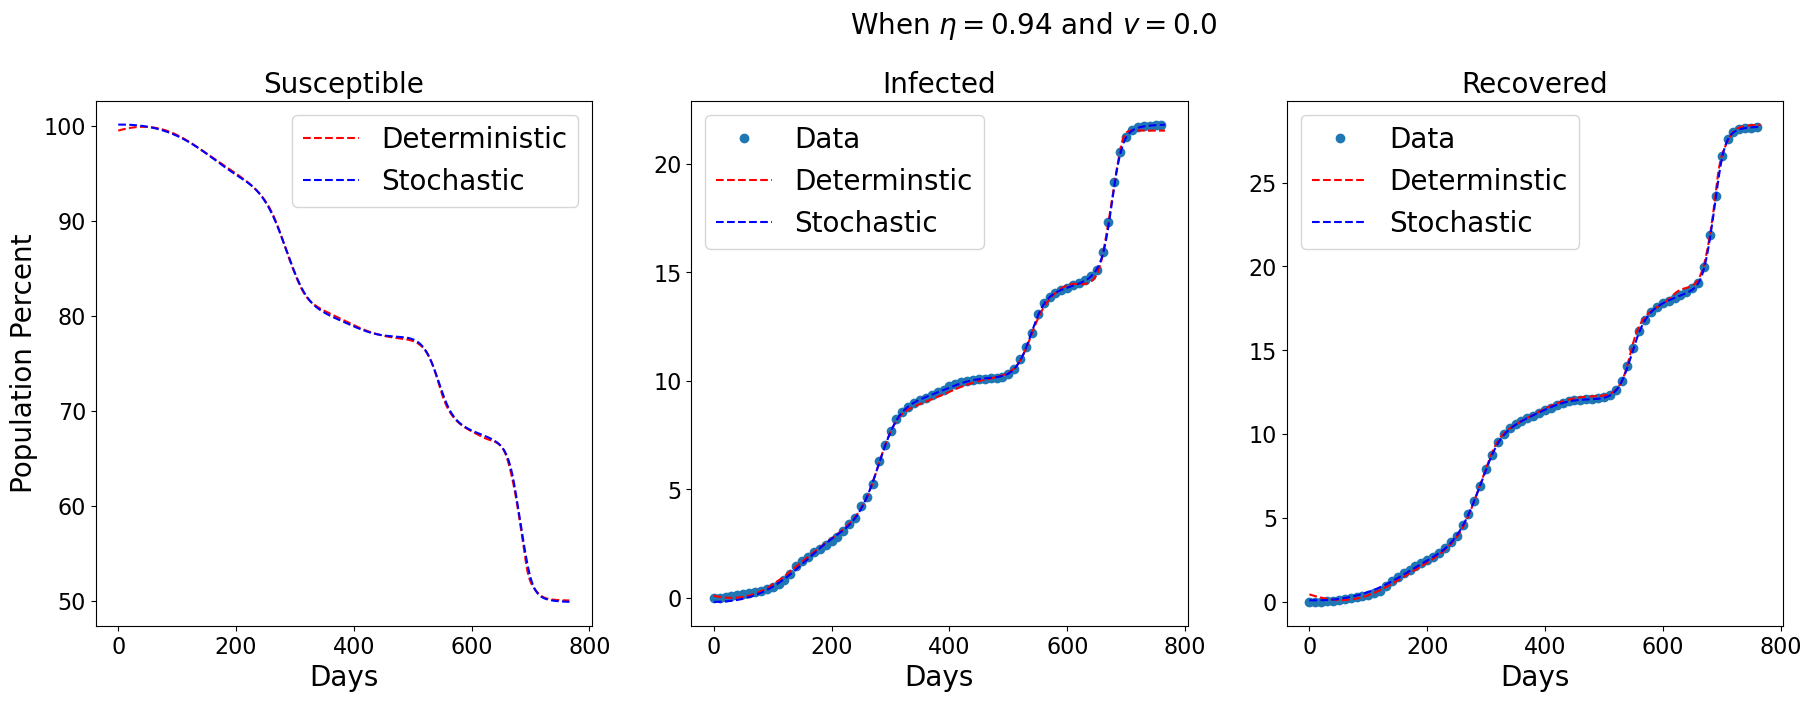




                   RMSE      MAPE        EV
Deterministic  0.125266  0.011225  0.999681
Stochastic     0.079185  0.007095  0.999869



               Mean Beta  Std Beta  Mean Gamma  Std Gamma       R_0
Deterministic   0.689250  0.000850    0.290260   0.000500  2.374595
Stochastic      0.350018  0.000381    0.151922   0.000412  2.303932


In [6]:
Sd9400 =np.loadtxt('Deterministic_const/Output/S_0.94_0.0.txt')
Id9400 =np.loadtxt('Deterministic_const/Output/I_0.94_0.0.txt')
Rd9400 =np.loadtxt('Deterministic_const/Output/R_0.94_0.0.txt')
Ss9400 =np.loadtxt('Stochastic_const/Output/S_0.94_0.0.txt')
Is9400 =np.loadtxt('Stochastic_const/Output/I_0.94_0.0.txt')
Rs9400 =np.loadtxt('Stochastic_const/Output/R_0.94_0.0.txt')
bd9400 =np.loadtxt('Deterministic_const/Output/beta_0.94_0.0.txt')
gd9400 =np.loadtxt('Deterministic_const/Output/gamma_0.94_0.0.txt')
bs9400 =np.loadtxt('Stochastic_const/Output/beta_0.94_0.0.txt')
gs9400 =np.loadtxt('Stochastic_const/Output/gamma_0.94_0.0.txt')


r00_d, r00_s=plotting_graphs(I1, R1, 2, Sd9400, Id9400, Rd9400, Ss9400, Is9400, Rs9400, 0.94, 0.00, bd9400, gd9400, bs9400, gs9400)



### When $\eta=0.94, v=0.5$

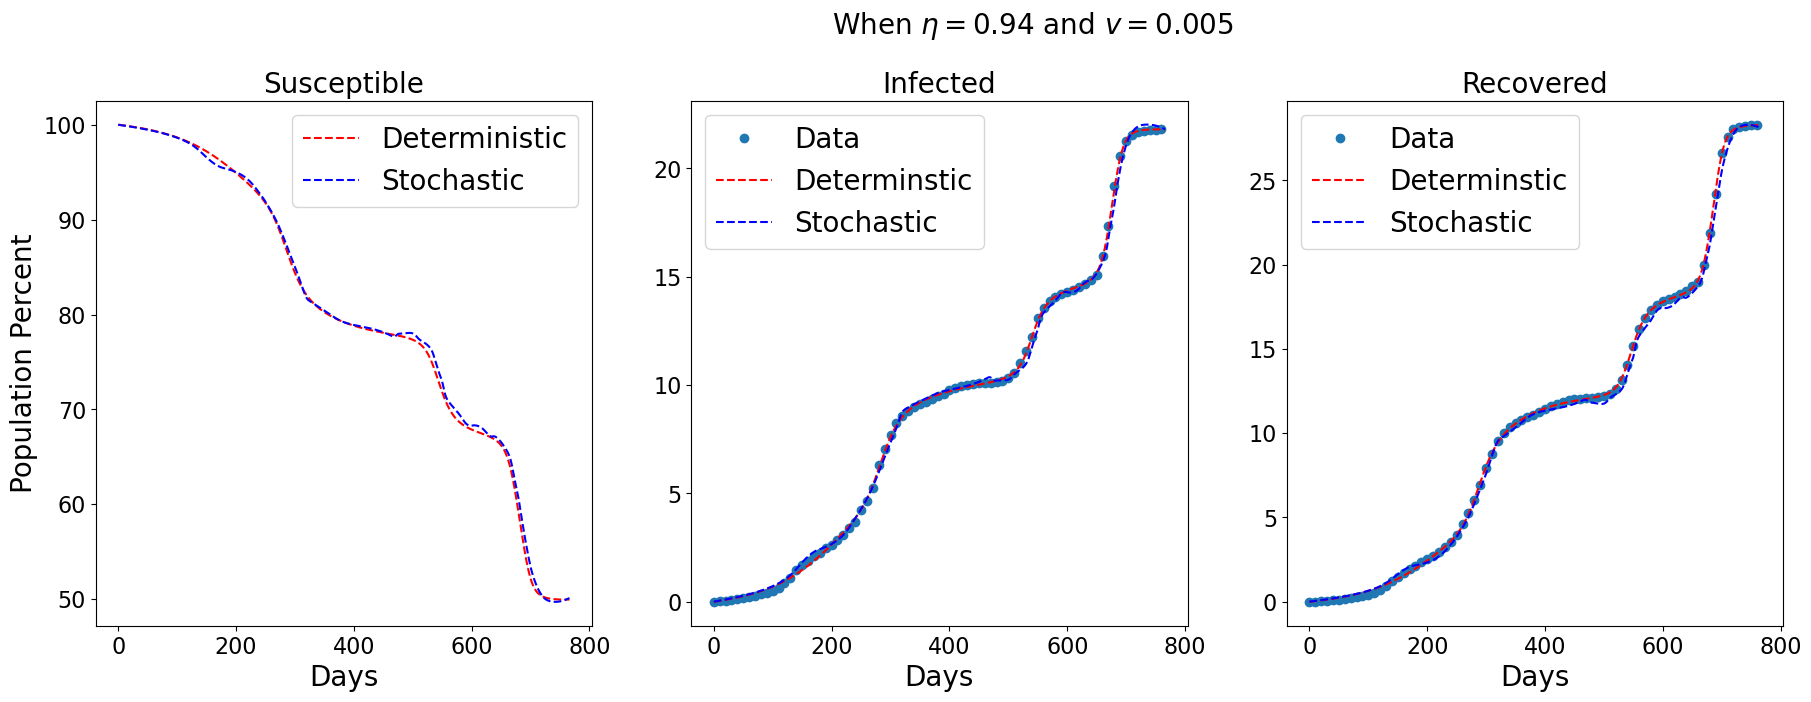




                   RMSE      MAPE        EV
Deterministic  0.097465  0.008733  0.999795
Stochastic     0.208620  0.018694  0.999015



               Mean Beta  Std Beta  Mean Gamma  Std Gamma       R_0
Deterministic   0.379801  0.015326    0.196151   0.009001  1.936268
Stochastic      0.312379  0.012810    0.163261   0.007615  1.913372


In [7]:
Sd94005 =np.loadtxt('Deterministic_const/Output/S_0.94_0.005.txt')
Id94005 =np.loadtxt('Deterministic_const/Output/I_0.94_0.005.txt')
Rd94005 =np.loadtxt('Deterministic_const/Output/R_0.94_0.005.txt')
Ss94005 =np.loadtxt('Stochastic_const/Output/S_0.94_0.005.txt')
Is94005 =np.loadtxt('Stochastic_const/Output/I_0.94_0.005.txt')
Rs94005 =np.loadtxt('Stochastic_const/Output/R_0.94_0.005.txt')
bd94005 =np.loadtxt('Deterministic_const/Output/beta_0.94_0.005.txt')
gd94005 =np.loadtxt('Deterministic_const/Output/gamma_0.94_0.005.txt')
bs94005 =np.loadtxt('Stochastic_const/Output/beta_0.94_0.005.txt')
gs94005 =np.loadtxt('Stochastic_const/Output/gamma_0.94_0.005.txt')


r005_d, r005_s =plotting_graphs(I1, R1, 10, Sd94005, Id94005, Rd94005, Ss94005, Is94005, Rs94005, 0.94, 0.005, bd94005, gd94005, bs94005, gs94005)

### When $\eta=0.94, v=1.00$

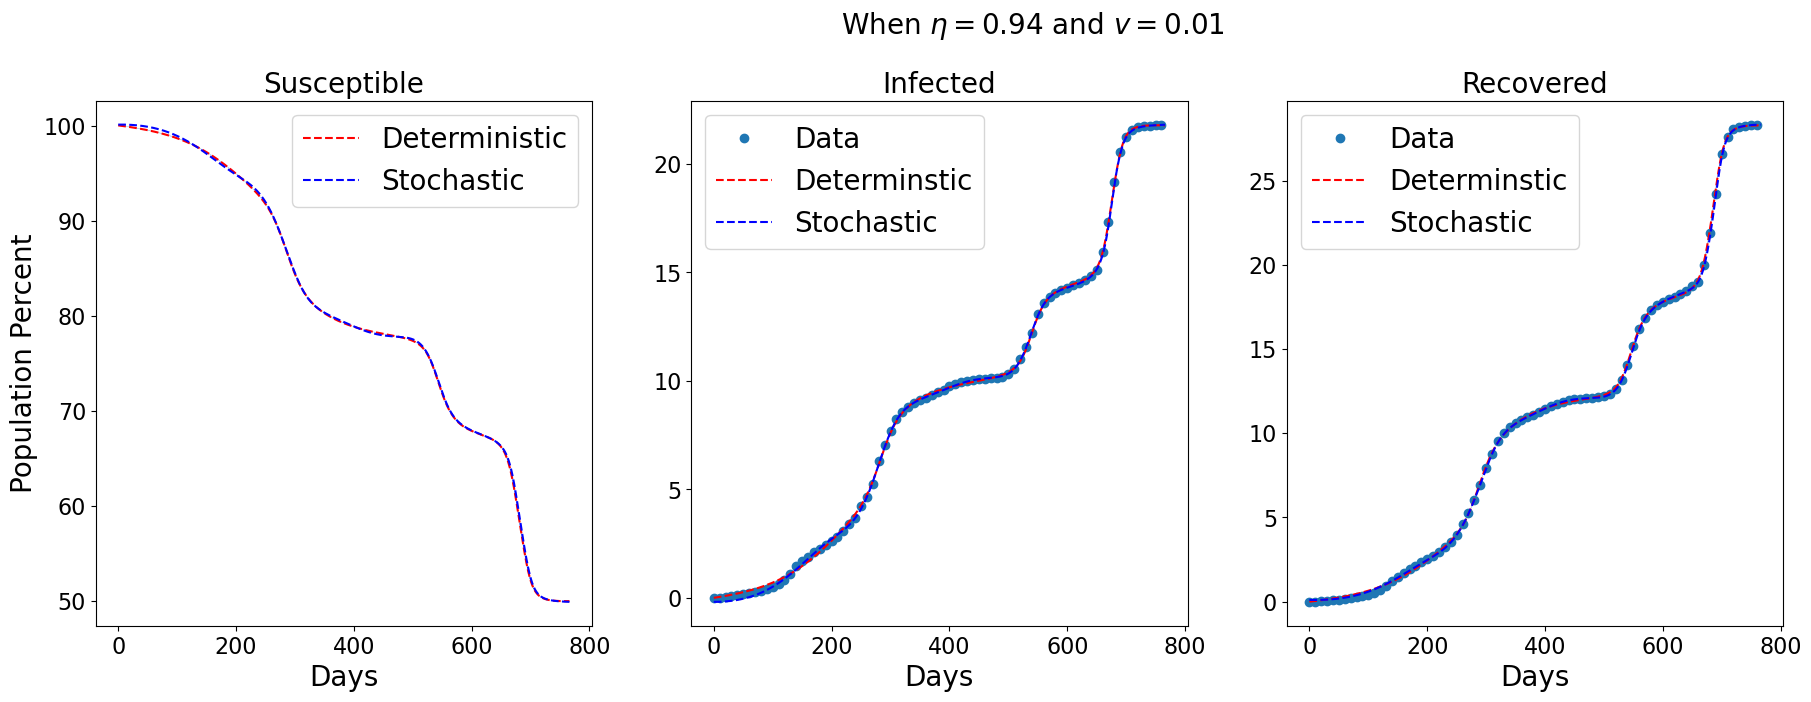




                   RMSE      MAPE        EV
Deterministic  0.099750  0.008938  0.999789
Stochastic     0.079221  0.007099  0.999869



               Mean Beta  Std Beta  Mean Gamma  Std Gamma       R_0
Deterministic   0.449702  0.016364    0.241948   0.010076  1.858672
Stochastic      0.351118  0.000339    0.198325   0.000464  1.770417


In [8]:
Sd9401 =np.loadtxt('Deterministic_const/Output/S_0.94_0.01.txt')
Id9401 =np.loadtxt('Deterministic_const/Output/I_0.94_0.01.txt')
Rd9401 =np.loadtxt('Deterministic_const/Output/R_0.94_0.01.txt')
Ss9401 =np.loadtxt('Stochastic_const/Output/S_0.94_0.01.txt')
Is9401 =np.loadtxt('Stochastic_const/Output/I_0.94_0.01.txt')
Rs9401 =np.loadtxt('Stochastic_const/Output/R_0.94_0.01.txt')
bd9401 =np.loadtxt('Deterministic_const/Output/beta_0.94_0.01.txt')
gd9401 =np.loadtxt('Deterministic_const/Output/gamma_0.94_0.01.txt')
bs9401 =np.loadtxt('Stochastic_const/Output/beta_0.94_0.01.txt')
gs9401 =np.loadtxt('Stochastic_const/Output/gamma_0.94_0.01.txt')


r01_d, r01_s=plotting_graphs(I1, R1, 10, Sd9401, Id9401, Rd9401, Ss9401, Is9401, Rs9401, 0.94, 0.01, bd9401, gd9401, bs9401, gs9401)

### When $\eta=0.94, v=2.00$

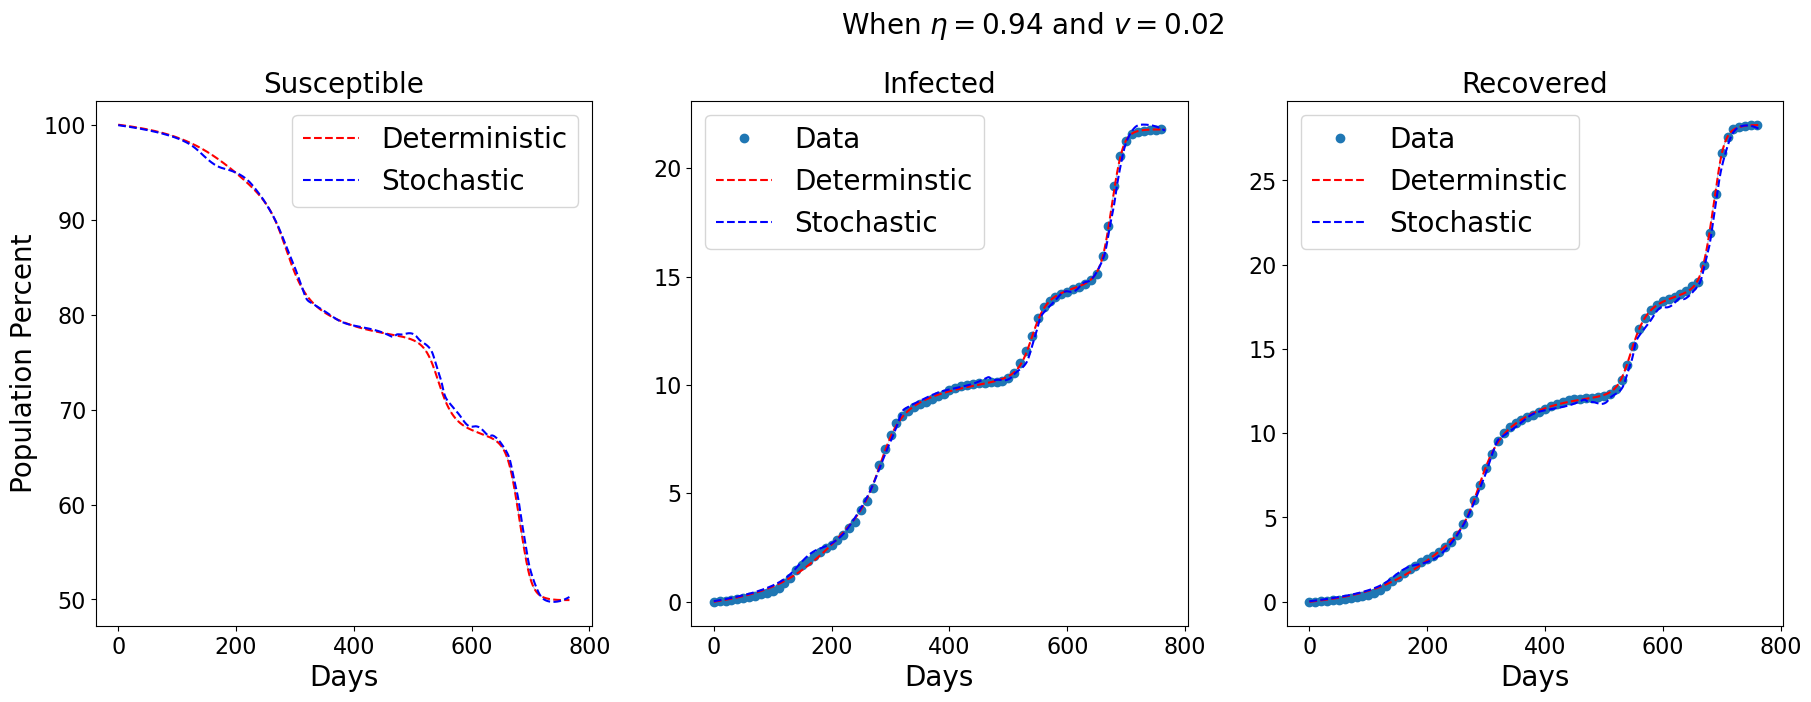




                   RMSE      MAPE        EV
Deterministic  0.097739  0.008758  0.999793
Stochastic     0.198905  0.017823  0.999134



               Mean Beta  Std Beta  Mean Gamma  Std Gamma       R_0
Deterministic   0.456364  0.016551    0.280497   0.011265  1.626984
Stochastic      0.269141  0.012022    0.178678   0.008668  1.506291


In [9]:
Sd9402 =np.loadtxt('Deterministic_const/Output/S_0.94_0.02.txt')
Id9402 =np.loadtxt('Deterministic_const/Output/I_0.94_0.02.txt')
Rd9402 =np.loadtxt('Deterministic_const/Output/R_0.94_0.02.txt')
Ss9402 =np.loadtxt('Stochastic_const/Output/S_0.94_0.02.txt')
Is9402 =np.loadtxt('Stochastic_const/Output/I_0.94_0.02.txt')
Rs9402 =np.loadtxt('Stochastic_const/Output/R_0.94_0.02.txt')
bd9402 =np.loadtxt('Deterministic_const/Output/beta_0.94_0.02.txt')
gd9402 =np.loadtxt('Deterministic_const/Output/gamma_0.94_0.02.txt')
bs9402 =np.loadtxt('Stochastic_const/Output/beta_0.94_0.02.txt')
gs9402 =np.loadtxt('Stochastic_const/Output/gamma_0.94_0.02.txt')


r02_d, r02_s=plotting_graphs(I1, R1, 10, Sd9402, Id9402, Rd9402, Ss9402, Is9402, Rs9402, 0.94, 0.02, bd9402, gd9402, bs9402, gs9402)

### When $\eta=0.94, v=3.00$

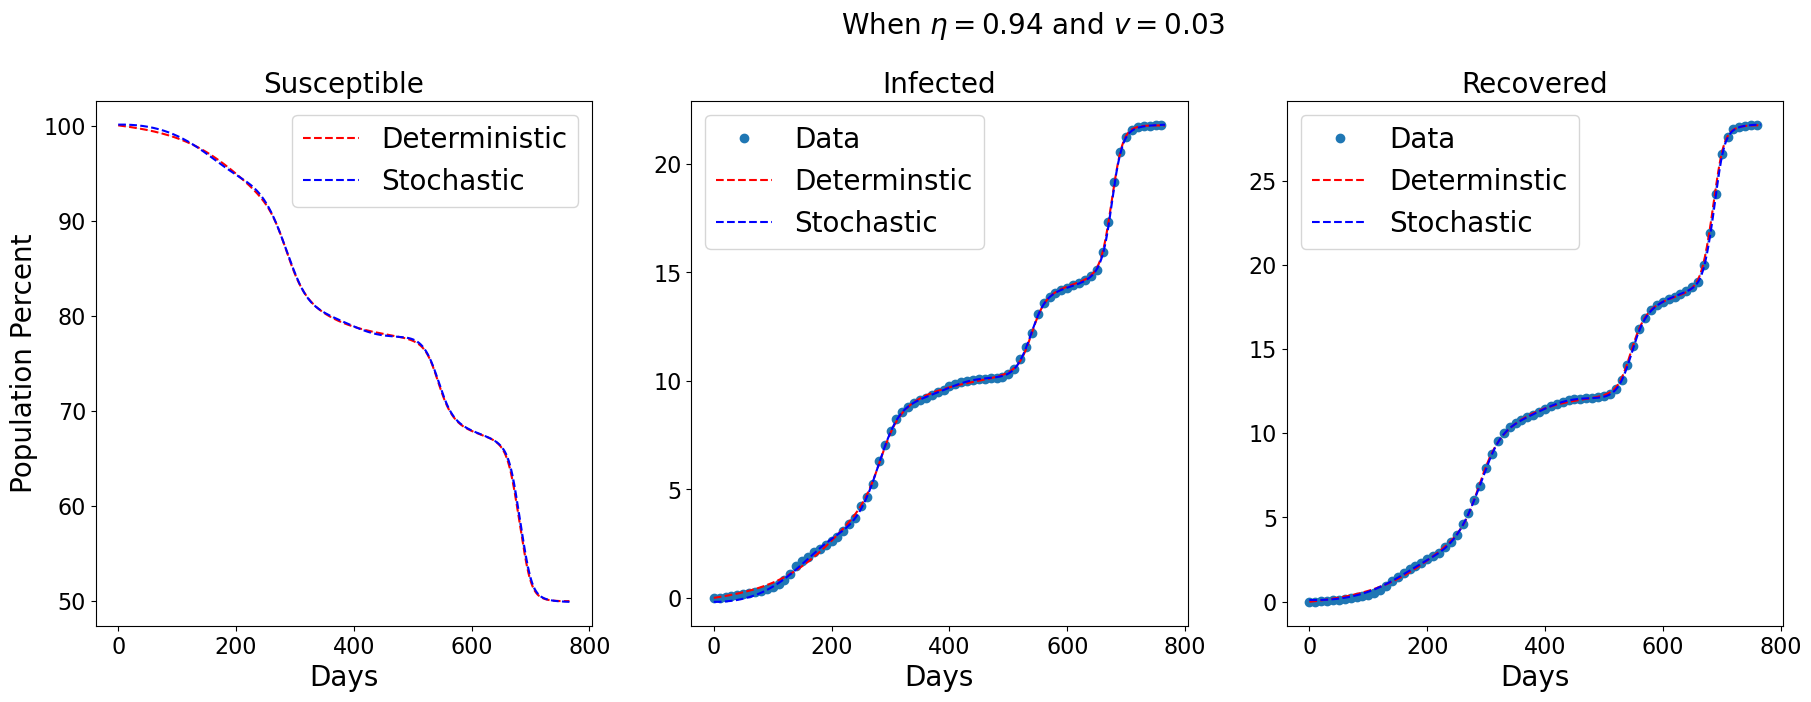




                   RMSE      MAPE        EV
Deterministic  0.099525  0.008918  0.999790
Stochastic     0.079113  0.007089  0.999869



               Mean Beta  Std Beta  Mean Gamma  Std Gamma       R_0
Deterministic   0.462420  0.016636    0.307579   0.011940  1.503419
Stochastic      0.352478  0.000295    0.246254   0.000502  1.431359


In [10]:
Sd9403 =np.loadtxt('Deterministic_const/Output/S_0.94_0.03.txt')
Id9403 =np.loadtxt('Deterministic_const/Output/I_0.94_0.03.txt')
Rd9403 =np.loadtxt('Deterministic_const/Output/R_0.94_0.03.txt')
Ss9403 =np.loadtxt('Stochastic_const/Output/S_0.94_0.03.txt')
Is9403 =np.loadtxt('Stochastic_const/Output/I_0.94_0.03.txt')
Rs9403 =np.loadtxt('Stochastic_const/Output/R_0.94_0.03.txt')
bd9403 =np.loadtxt('Deterministic_const/Output/beta_0.94_0.03.txt')
gd9403 =np.loadtxt('Deterministic_const/Output/gamma_0.94_0.03.txt')
bs9403 =np.loadtxt('Stochastic_const/Output/beta_0.94_0.03.txt')
gs9403 =np.loadtxt('Stochastic_const/Output/gamma_0.94_0.03.txt')


r03_d, r03_s=plotting_graphs(I1, R1, 10, Sd9403, Id9403, Rd9403, Ss9403, Is9403, Rs9403, 0.94, 0.03, bd9403, gd9403, bs9403, gs9403)

### When $\eta=0.94, v=6.00$

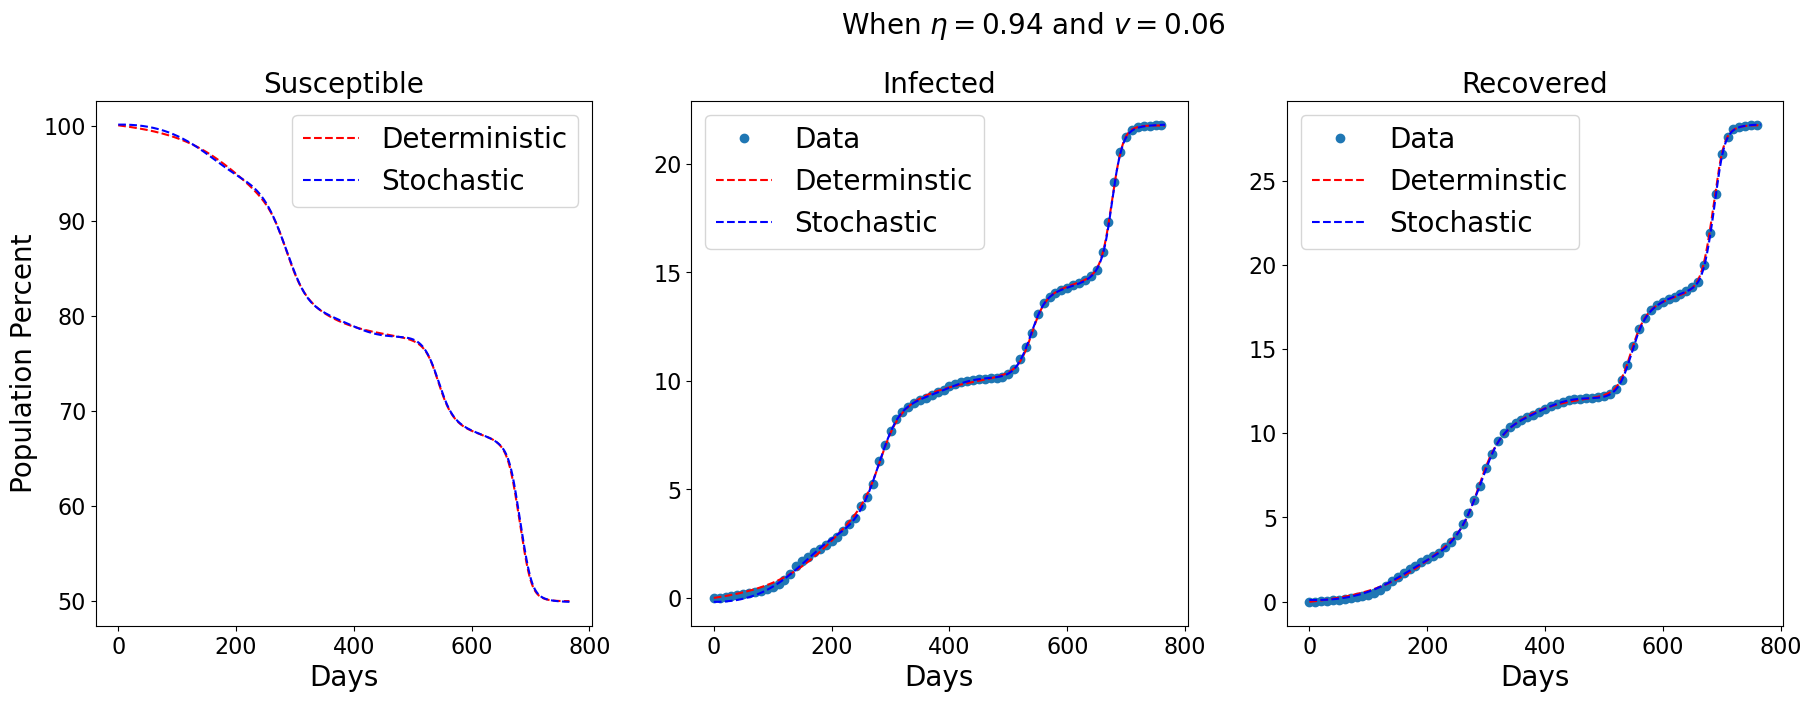




                   RMSE      MAPE        EV
Deterministic  0.096687  0.008664  0.999795
Stochastic     0.079043  0.007083  0.999869



               Mean Beta  Std Beta  Mean Gamma  Std Gamma       R_0
Deterministic   0.466843  0.016679    0.326858   0.012370  1.428275
Stochastic      0.258727  0.000255    0.197126   0.000507  1.312496


In [11]:
Sd9406 =np.loadtxt('Deterministic_const/Output/S_0.94_0.06.txt')
Id9406 =np.loadtxt('Deterministic_const/Output/I_0.94_0.06.txt')
Rd9406 =np.loadtxt('Deterministic_const/Output/R_0.94_0.06.txt')
Ss9406 =np.loadtxt('Stochastic_const/Output/S_0.94_0.06.txt')
Is9406 =np.loadtxt('Stochastic_const/Output/I_0.94_0.06.txt')
Rs9406 =np.loadtxt('Stochastic_const/Output/R_0.94_0.06.txt')
bd9406 =np.loadtxt('Deterministic_const/Output/beta_0.94_0.06.txt')
gd9406 =np.loadtxt('Deterministic_const/Output/gamma_0.94_0.06.txt')
bs9406 =np.loadtxt('Stochastic_const/Output/beta_0.94_0.06.txt')
gs9406 =np.loadtxt('Stochastic_const/Output/gamma_0.94_0.06.txt')


r06_d, r06_s=plotting_graphs(I1, R1, 10, Sd9406, Id9406, Rd9406, Ss9406, Is9406, Rs9406, 0.94, 0.06, bd9406, gd9406, bs9406, gs9406)

### When $\eta=0.94, v=10.00$

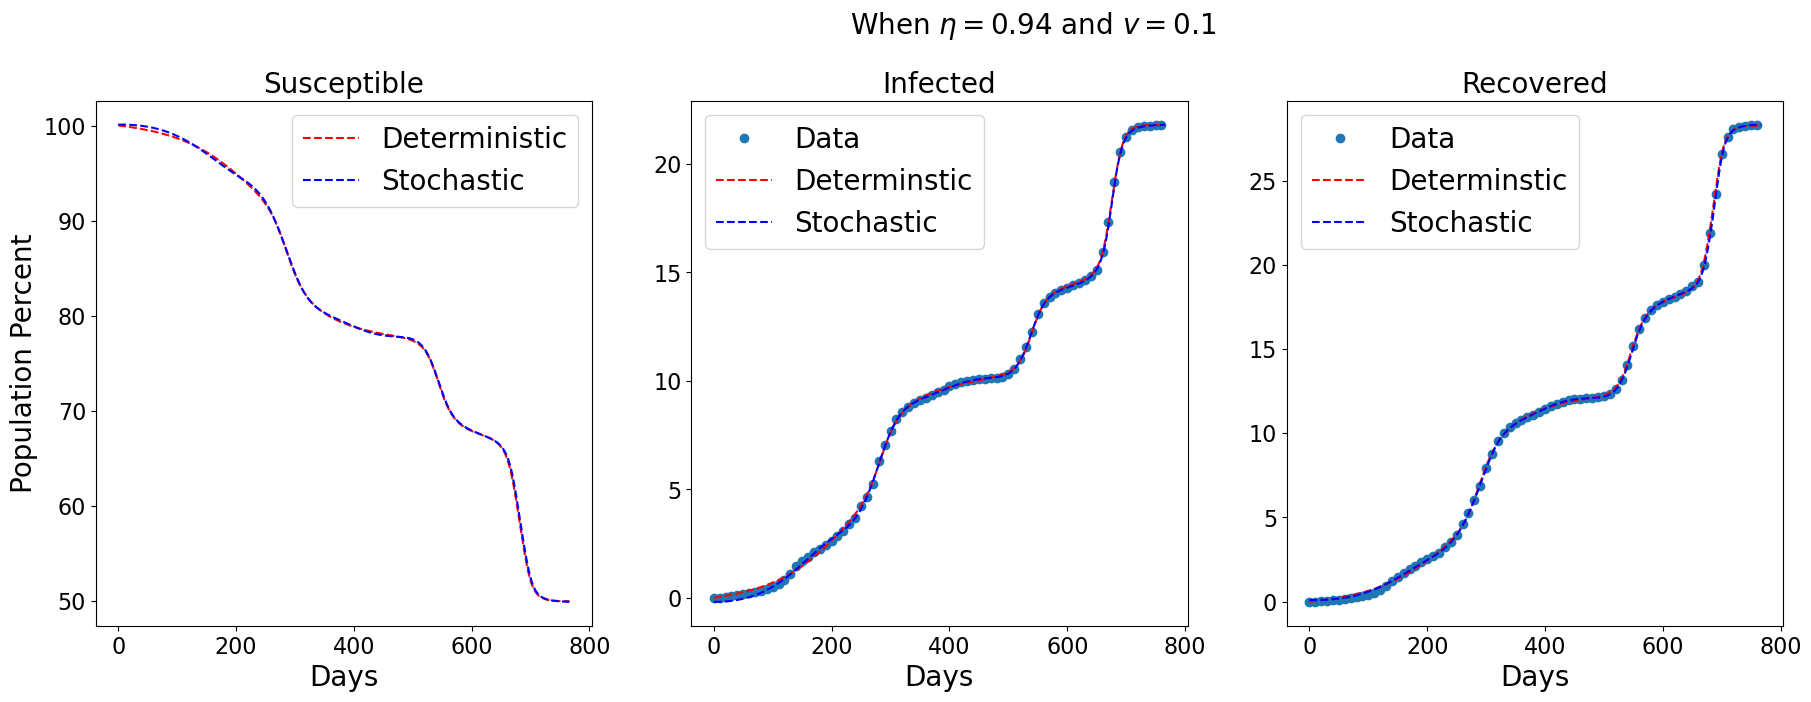




                   RMSE      MAPE        EV
Deterministic  0.099931  0.008954  0.999796
Stochastic     0.079686  0.007140  0.999868



               Mean Beta  Std Beta  Mean Gamma  Std Gamma       R_0
Deterministic   0.179805  0.010848    0.151279    0.00915  1.188565
Stochastic      0.355005  0.000249    0.314455    0.00054  1.128953


In [12]:
Sd9410 =np.loadtxt('Deterministic_const/Output/S_0.94_0.1.txt')
Id9410 =np.loadtxt('Deterministic_const/Output/I_0.94_0.1.txt')
Rd9410 =np.loadtxt('Deterministic_const/Output/R_0.94_0.1.txt')
Ss9410 =np.loadtxt('Stochastic_const/Output/S_0.94_0.1.txt')
Is9410 =np.loadtxt('Stochastic_const/Output/I_0.94_0.1.txt')
Rs9410 =np.loadtxt('Stochastic_const/Output/R_0.94_0.1.txt')
bd9410 =np.loadtxt('Deterministic_const/Output/beta_0.94_0.1.txt')
gd9410 =np.loadtxt('Deterministic_const/Output/gamma_0.94_0.1.txt')
bs9410 =np.loadtxt('Stochastic_const/Output/beta_0.94_0.1.txt')
gs9410 =np.loadtxt('Stochastic_const/Output/gamma_0.94_0.1.txt')


r10_d, r10_s=plotting_graphs(I1, R1, 10, Sd9410, Id9410, Rd9410, Ss9410, Is9410, Rs9410, 0.94, 0.10, bd9410, gd9410, bs9410, gs9410)

## Graph of Reproductive Number

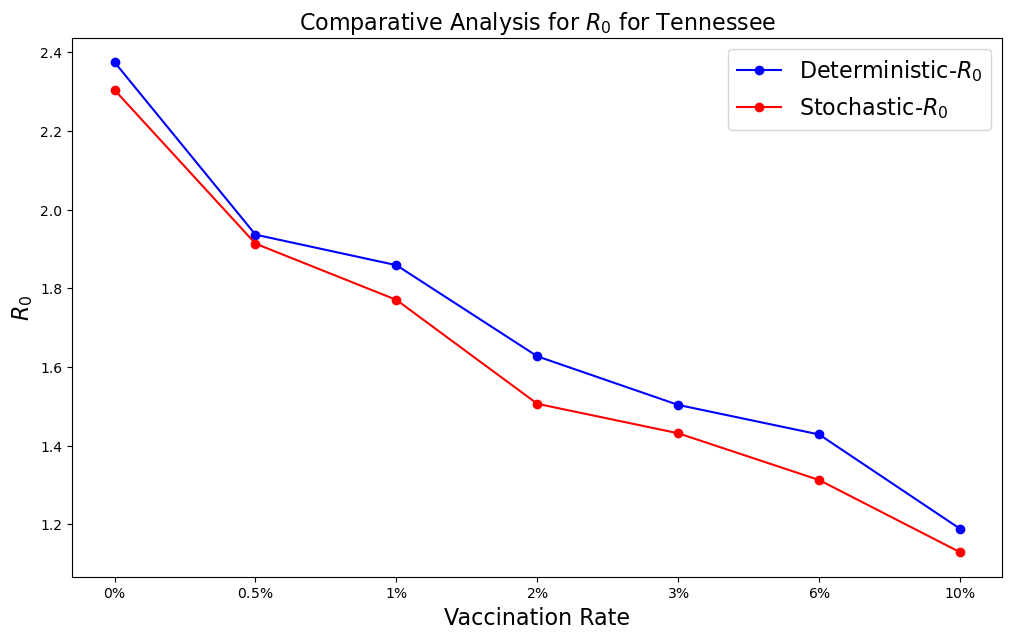

In [13]:
r_der =np.array([r00_d, r005_d, r01_d, r02_d, r03_d, r06_d, r10_d])
r_st  =np.array([r00_s, r005_s, r01_s, r02_s, r03_s, r06_s, r10_s])
xarr =np.array(['$0\%$','$0.5\%$', '$1\%$','$2\%$', '$3\%$', '$6\%$','$10\%$' ])
font =16
plt.figure(figsize=(12, 7))
plt.plot(xarr, r_der, '-ob')
plt.plot(xarr, r_st, '-or')
plt.legend(['Deterministic-$R_0$', 'Stochastic-$R_0$'], fontsize=font)
plt.xlabel('Vaccination Rate', fontsize=font)
plt.ylabel('$R_0$', fontsize=font)
plt.title('Comparative Analysis for $R_0$ for Tennessee', fontsize=font)
plt.savefig(out+'r0_tn.pdf')
plt.show()